In [1]:
import matplotlib.pyplot as plt
import numpy as np

Check event generation

In [2]:
from generator import Response

In [3]:
from generator import OscPars

In [4]:
from generator import Generator

# Histograms

In [5]:
bin_edges = np.logspace(1., 2., 26)

Re-weighting to a different set of oscillation parameters

In [6]:
response = Response(1., 1.)

In [7]:
gen2 = Generator(int(1e5), 2.7, response, OscPars(0.1, 0.1))
h2 = gen2.get_histogram(bin_edges)
hist2, hist2_unc = h2['hist'], h2['hist_unc']


Generating events between 1.0 GeV and 1000 GeV and cos(zenith) values between -1.0 and -1.0


In [8]:
gen = Generator(int(1e5), 2.7, response)
gen.reweight_oscillation(OscPars(0.1, 0.1))

h = gen.get_histogram(bin_edges)
hist, hist_unc = h['hist'], h['hist_unc']

Generating events between 1.0 GeV and 1000 GeV and cos(zenith) values between -1.0 and -1.0


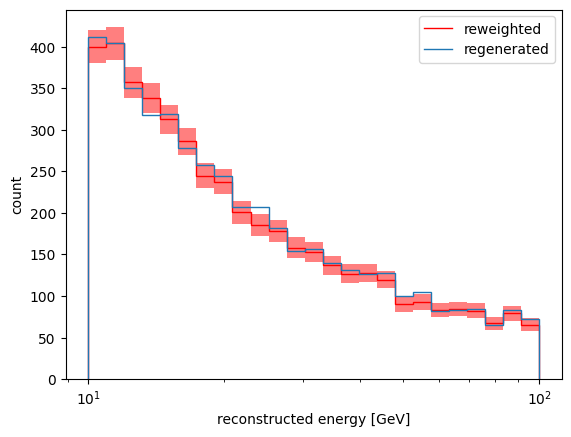

In [9]:
# first and last bin are overflow bins in hist
plt.stairs(hist[1:-1], bin_edges, label='reweighted', color='r')
plt.stairs(hist[1:-1]+hist_unc[1:-1], bin_edges,
    baseline=hist[1:-1]-hist_unc[1:-1], fill=True,
    color='r', alpha=0.5)
plt.stairs(hist2[1:-1], bin_edges, label='regenerated')
plt.xscale('log')
plt.xlabel('reconstructed energy [GeV]')
plt.ylabel('count')

plt.legend()

Re-weighting to a different detector response

In [11]:
response2 = Response(0.5, 1)
gen2 = Generator(int(1e5), 2.7, response2)
h2 = gen2.get_histogram(bin_edges)
hist2, hist2_unc = h2['hist'], h2['hist_unc']

#
response = Response(1.5, 2)
gen = Generator(int(1e5), 2.7, response)
h0 = gen.get_histogram(bin_edges)
hist0, hist0_unc = h0['hist'], h0['hist_unc']

gen.reweight_detector_response(response2)

h = gen.get_histogram(bin_edges)
hist, hist_unc = h['hist'], h['hist_unc']

Generating events between 1.0 GeV and 1000 GeV and cos(zenith) values between -1.0 and -1.0
Generating events between 1.0 GeV and 1000 GeV and cos(zenith) values between -1.0 and -1.0


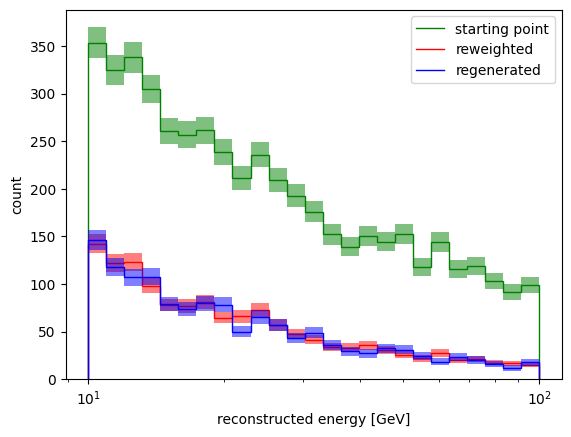

In [12]:
# first and last bin are overflow bins in hist
plt.stairs(hist0[1:-1], bin_edges, label='starting point', color='g')
plt.stairs(hist0[1:-1]+hist0_unc[1:-1], bin_edges,
    baseline=hist0[1:-1]-hist0_unc[1:-1], fill=True,
    color='g', alpha=0.5)

plt.stairs(hist[1:-1], bin_edges, label='reweighted', color='r')
plt.stairs(hist[1:-1]+hist_unc[1:-1], bin_edges,
    baseline=hist[1:-1]-hist_unc[1:-1], fill=True,
    color='r', alpha=0.5)

plt.stairs(hist2[1:-1], bin_edges, label='regenerated', color='b')
plt.stairs(hist2[1:-1]+hist2_unc[1:-1], bin_edges,
    baseline=hist2[1:-1]-hist2_unc[1:-1], fill=True,
    color='b', alpha=0.5)
plt.xscale('log')
plt.xlabel('reconstructed energy [GeV]')
plt.ylabel('count')

plt.legend()